# Name: Feenaz Aarif

# Create a Decision Tree classifier and visulaize it graphically using the iris dataset

# Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
iris = pd.read_csv('E:/Sparks Foundation Internship/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_original = iris.copy()

# Exploratory data analysis

In [4]:
iris.shape

(150, 6)

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.drop('Id',axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data visualization

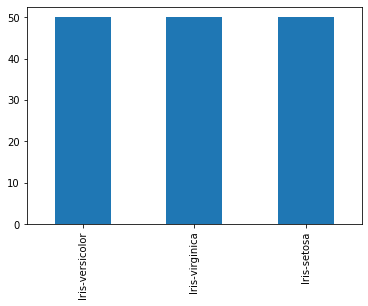

In [11]:
iris['Species'].value_counts().plot.bar()

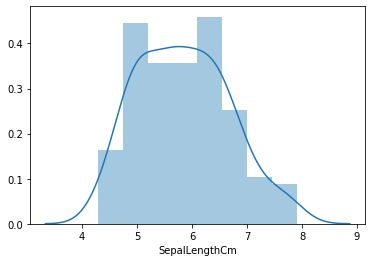

In [12]:
sns.distplot(iris['SepalLengthCm']) # to see the distribution

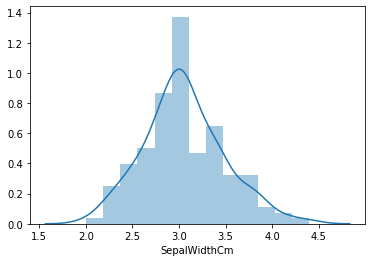

In [13]:
sns.distplot(iris['SepalWidthCm'])

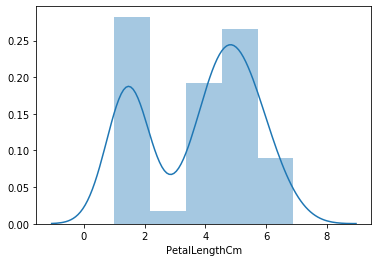

In [14]:
sns.distplot(iris['PetalLengthCm'])

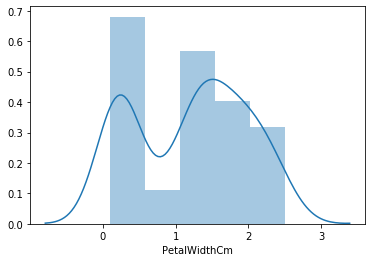

In [15]:
sns.distplot(iris['PetalWidthCm'])

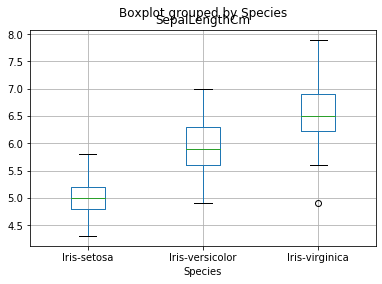

In [16]:
iris.boxplot(column = 'SepalLengthCm', by = 'Species') # distribution grouped by species

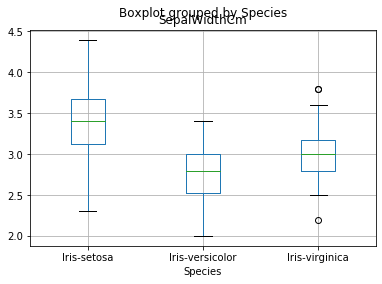

In [17]:
iris.boxplot(column = 'SepalWidthCm', by = 'Species')

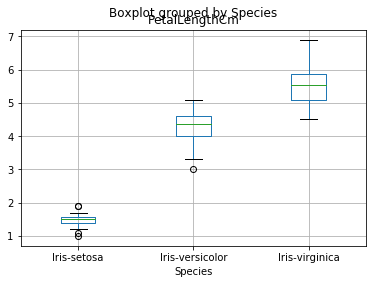

In [18]:
iris.boxplot(column = 'PetalLengthCm', by = 'Species')

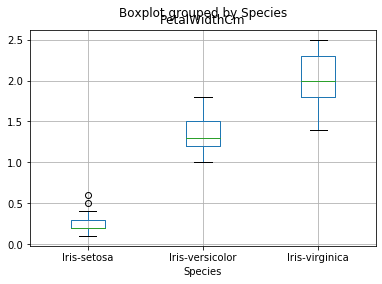

In [19]:
iris.boxplot(column = 'PetalWidthCm', by = 'Species')

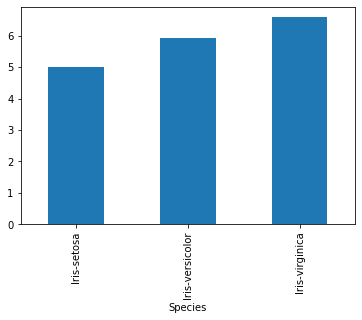

In [20]:
iris.groupby('Species')['SepalLengthCm'].mean().plot.bar()

In [21]:
bins = [0,5,7,9]
group = ['Low', 'Average', 'High']
iris['SepalLength_bin'] = pd.cut(iris['SepalLengthCm'], bins, labels = group)
iris['SepalLength_bin']

0      Average
1          Low
2          Low
3          Low
4          Low
        ...   
145    Average
146    Average
147    Average
148    Average
149    Average
Name: SepalLength_bin, Length: 150, dtype: category
Categories (3, object): [Low < Average < High]

In [22]:
SepalLength_bin = pd.crosstab(iris['SepalLength_bin'], iris['Species'])
SepalLength_bin

Species,Iris-setosa,Iris-versicolor,Iris-virginica
SepalLength_bin,,,
Low,28,3,1
Average,22,47,37
High,0,0,12


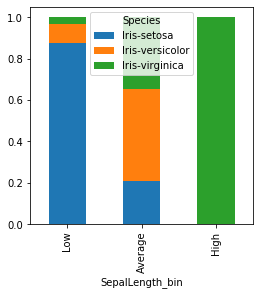

In [23]:
# Sepal length by species
SepalLength_bin.div(SepalLength_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

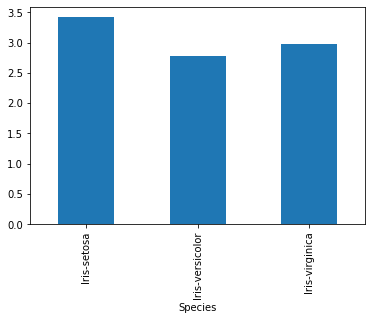

In [24]:
iris.groupby('Species')['SepalWidthCm'].mean().plot.bar()

In [25]:
bins = [0,2.5,3.5,5]
group = ['Low', 'Average', 'High']
iris['SepalWidth_bin'] = pd.cut(iris['SepalWidthCm'], bins, labels = group)

In [26]:
SepalWidth_bin = pd.crosstab(iris['SepalWidth_bin'], iris['Species'])
SepalWidth_bin

Species,Iris-setosa,Iris-versicolor,Iris-virginica
SepalWidth_bin,,,
Low,1,13,5
Average,34,37,42
High,15,0,3


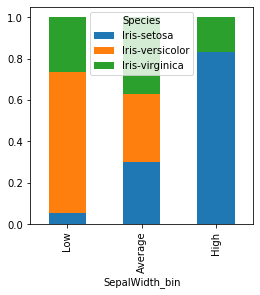

In [27]:
# Sepal width by species
SepalWidth_bin.div(SepalWidth_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

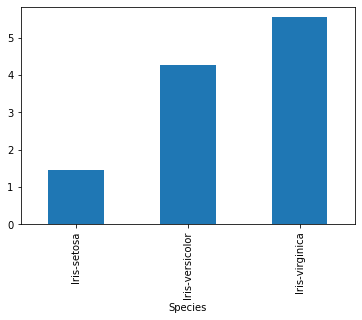

In [28]:
iris.groupby('Species')['PetalLengthCm'].mean().plot.bar()

In [29]:
bins = [0,2,6,9]
group = ['Low', 'Average', 'High']
iris['PetalLength_bin'] = pd.cut(iris['PetalLengthCm'], bins, labels = group)

In [30]:
PetalLength_bin = pd.crosstab(iris['PetalLength_bin'], iris['Species'])
PetalLength_bin

Species,Iris-setosa,Iris-versicolor,Iris-virginica
PetalLength_bin,,,
Low,50,0,0
Average,0,50,41
High,0,0,9


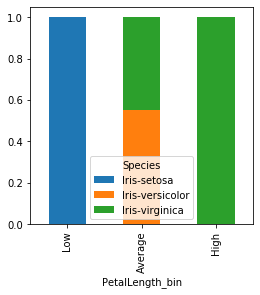

In [31]:
# Petal length by species
PetalLength_bin.div(PetalLength_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

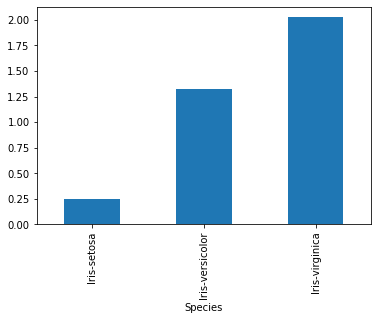

In [32]:
iris.groupby('Species')['PetalWidthCm'].mean().plot.bar()

In [33]:
bins = [0,1,2,3]
group = ['Low', 'Average', 'High']
iris['PetalWidth_bin'] = pd.cut(iris['PetalWidthCm'], bins, labels = group)

In [34]:
PetalWidth_bin = pd.crosstab(iris['PetalWidth_bin'], iris['Species'])
PetalWidth_bin

Species,Iris-setosa,Iris-versicolor,Iris-virginica
PetalWidth_bin,,,
Low,50,7,0
Average,0,43,27
High,0,0,23


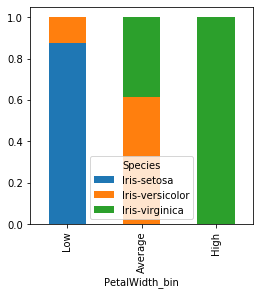

In [35]:
# Petal width by species
PetalWidth_bin.div(PetalWidth_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [36]:
iris= iris.drop(['SepalLength_bin', 'SepalWidth_bin', 'PetalLength_bin', 'PetalWidth_bin'], axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


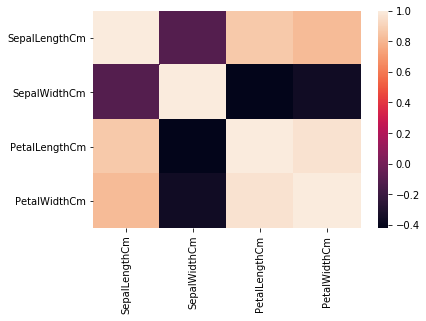

In [37]:
sns.heatmap(iris.corr()) # correlatio matrix

# Model Building

In [38]:
from sklearn.preprocessing import LabelEncoder
iris['Species'] = LabelEncoder().fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
train = dtree.fit(x_train, y_train)
train

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
y_pred = dtree.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

1.0

In [45]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

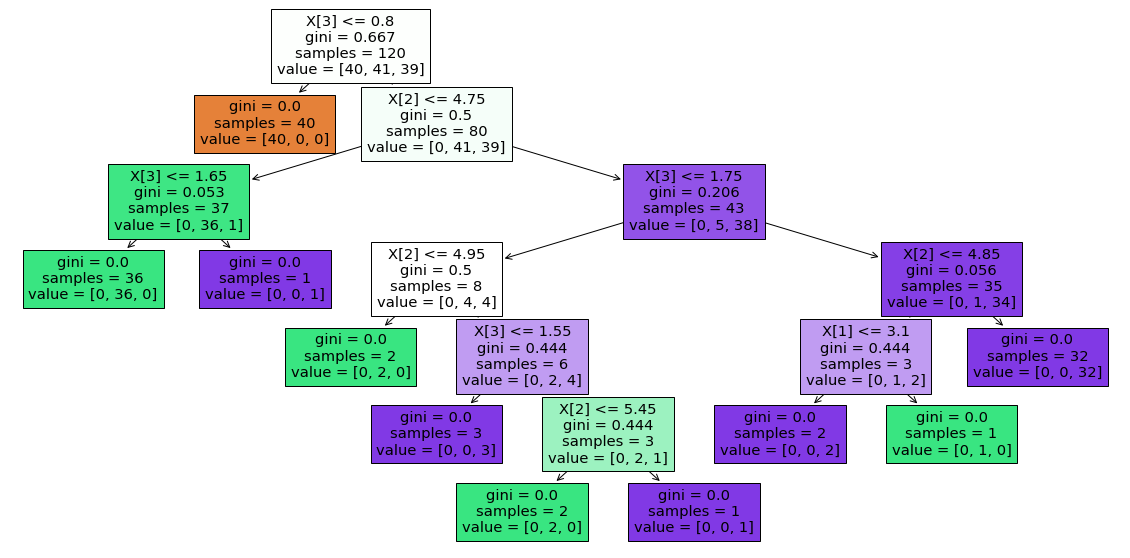

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 10))
plot_tree(train, filled = True)
plt.show()